In [1]:
import numpy as np
DEFAULT_FILENAME = "input10.txt"
def read_chars(filename = DEFAULT_FILENAME):
    res = []
    with open(filename, "r") as f:
        for li in f:
            res.append([*li.strip()])
    return res

In [2]:
values = np.array(read_chars())
dis = np.zeros(values.shape, dtype=int)
dis[:,:] = -1 # not visited
dis[np.where(values == 'S')] = 0
for i in range(values.size):
  source = np.where(dis == i)
  for x, y in zip(source[0], source[1]):
    if x > 0:
      if values[x-1, y] in ['7', 'F', '|'] and dis[x-1, y] == -1:
        if values[x, y] in ['|', 'L', 'J', 'S']:
          dis[x-1, y] = i+1
    if x < dis.shape[0]-1:
      if values[x+1, y] in ['J', 'L', '|'] and dis[x+1, y] == -1:
        if values[x, y] in ['|', '7', 'F', 'S']:
          dis[x+1, y] = i+1
    if y > 0:
      if values[x, y-1] in ['L', 'F', '-'] and dis[x, y-1] == -1:
        if values[x, y] in ['J', '7', '-', 'S']:
          dis[x, y-1] = i+1
    if y < dis.shape[1]-1:
      if values[x, y+1] in ['J', '7', '-'] and dis[x, y+1] == -1:
        if values[x, y] in ['L', 'F', '-', 'S']:
          dis[x, y+1] = i+1
print(f"Part 1: {np.max(dis)}")


Part 1: 6856


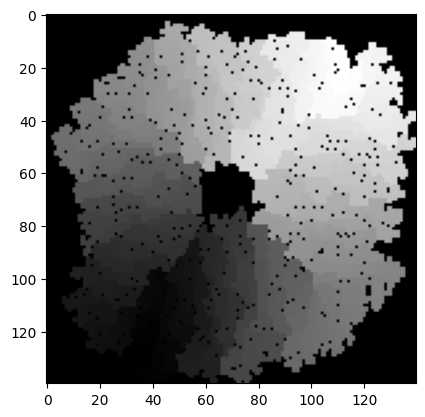

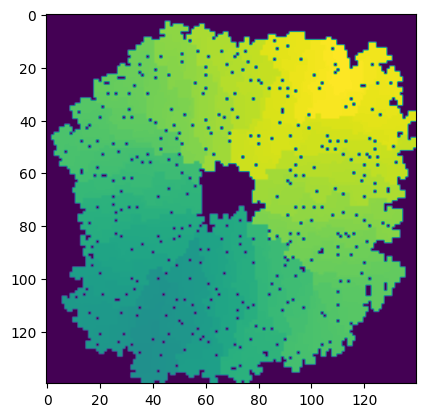

In [3]:
# https://www.reddit.com/18ewh51
import matplotlib.pyplot as plt
plt.imshow(dis, cmap='grey')
plt.show()
dis_plot = dis.copy()
dis_plot[np.where(dis == -1)] = -1 * np.max(dis)
plt.imshow(dis_plot)
plt.show()
del dis_plot

In [4]:
# hardcoded for my specific input
values[np.where(values == 'S')] = 'F'
sol2 = 0
for x in range(140):
  parity = 0
  pending = ''
  for y in range(140):
    if dis[x, y] == -1:
      sol2 += parity % 2
      continue
    if values[x, y] in ['|']:
      parity += 1
    if values[x, y] in ['F', 'L']:
      pending = values[x, y]
    if values[x, y] in ['7', 'J'] and pending != '':
      if pending == 'F' and values[x, y] == 'J':
        parity += 1
      if pending == 'L' and values[x, y] == '7':
        parity += 1
      pending = ''

print(f"Part 2: {sol2}")


Part 2: 501
